In [79]:
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import re
import os

In [80]:
root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
log_path = os.path.join(root_path, 'log')
log_prefix = 'lockfree-nohotspot-skiplist'
log_file_names = glob.glob(log_path + f"/{log_prefix}-*.log")
name_pattern = re.compile(rf".+{log_prefix}-n(\d+)-r(\d+)-i(\d+)-u(\d+)\.\d+\.log")

colors = [
  '#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928',
  '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99',
  '#8da0cb', '#66c2a5', '#fc8d62', '#8c564b', '#b3b3b3', '#cccccc'
]

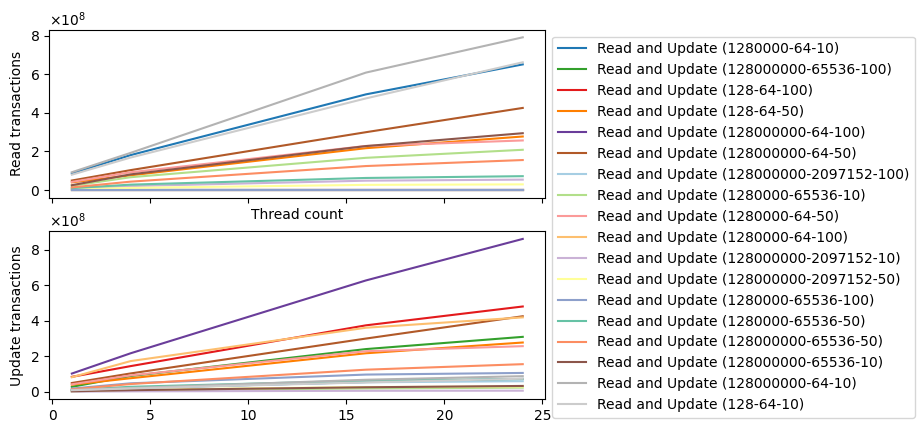

In [86]:

threads = set()
targets = dict()

for log_file in log_file_names:
  match = name_pattern.match(log_file)
  if match:
    n = int(match.group(1))
    r = int(match.group(2))
    i = int(match.group(3))
    u = int(match.group(4))
  else:
    print(f"No match for {log_file}")
    continue

  key = f"{r}-{i}-{u}"

  threads.add(n)
  if key not in targets:
    targets[key] = []

  tmp = [n, r, i, u]
  
  with open(log_file, 'r') as f:
    lines = f.readlines()
    for line in lines:
      if line.startswith('#read txs'):
        tmp.append(int(line.split()[3]))
      if line.startswith('#update txs'):
        tmp.append(int(line.split()[3]))

  targets[key].append(tmp)

fig, axs = plt.subplots(2, 1, sharex=True)

i = 0
for key, values in targets.items():
  values.sort(key=lambda x: x[0])
  threads, read_txs, update_txs = zip(*[(value[0], value[-2], value[-1]) for value in values])

  axs[0].plot(threads, read_txs, label=f"Read and Update ({key})", color=colors[i])
  axs[1].plot(threads, update_txs, color=colors[i])
  i += 1

axs[0].set_xlabel('Thread count')
axs[0].set_ylabel('Read transactions')
axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[1].set_ylabel('Update transactions')
axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.show()